# Importación de librerias

Importamos las librerías necesarias para el procesamiento de audios en python.  

In [14]:
from scipy.io import wavfile
import IPython
import os
import numpy as np
import matplotlib.pyplot as plt

# Guardar directorios de los audios a procesar

Guardamos las direcciones donde están los audios que vamos a procesar. Los audios elegidos son los proporcionados por el profesor en su github.    

In [15]:
# Cargamos los archivos de audio.
cwd = os.getcwd()
audio_input_path = os.path.join(cwd, os.path.join('audio_input')) # Directorio con los audios de entrada.
audio_output_path = os.path.join(cwd, os.path.join('audio_output')) # Directorio donde guardaremos los audios modificados.
sample_rate_48, audio_data_48 = wavfile.read(filename=os.path.join(audio_input_path, 'the_last_of_us_reduced.wav'))
sample_rate_24, audio_data_24 = wavfile.read(filename=os.path.join(audio_input_path, 'sample_24kHz.wav'))

# Otro ejemplo sería: audio_data, sample_rate = librosa.load(filename)

print(f'{audio_data_48.shape}\n')  # Audio mono
print(f'{audio_data_24.shape}\n')  # Audio mono

(1420427, 2)

(88271,)



In [16]:
IPython.display.Audio(audio_data_48, rate=sample_rate_48)

Exception ignored in: <function Wave_write.__del__ at 0x000002D6F39F7D80>
Traceback (most recent call last):
  File "c:\Users\pcasa\AppData\Local\Programs\Python\Python313\Lib\wave.py", line 471, in __del__
    self.close()
  File "c:\Users\pcasa\AppData\Local\Programs\Python\Python313\Lib\wave.py", line 595, in close
    self._ensure_header_written(0)
  File "c:\Users\pcasa\AppData\Local\Programs\Python\Python313\Lib\wave.py", line 618, in _ensure_header_written
    self._write_header(datasize)
  File "c:\Users\pcasa\AppData\Local\Programs\Python\Python313\Lib\wave.py", line 622, in _write_header
    self._file.write(b'RIFF')
ValueError: I/O operation on closed file.
Exception ignored in: <function Wave_write.__del__ at 0x000002D6F39F7D80>
Traceback (most recent call last):
  File "c:\Users\pcasa\AppData\Local\Programs\Python\Python313\Lib\wave.py", line 471, in __del__
    self.close()
  File "c:\Users\pcasa\AppData\Local\Programs\Python\Python313\Lib\wave.py", line 595, in close
   

error: 'H' format requires 0 <= number <= 65535

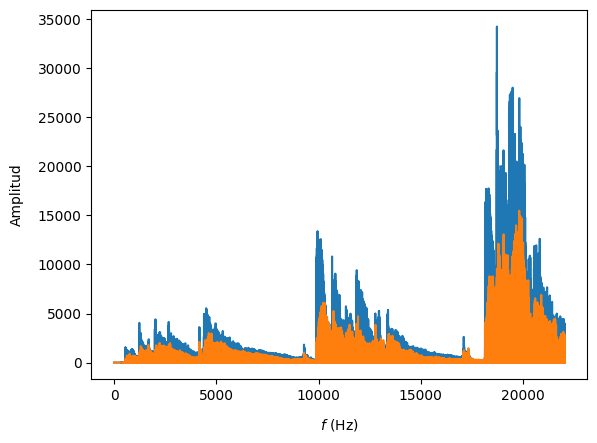

In [9]:
# La longitud del array de datos y el
# sample rate (frecuencia de muestreo).
n = len(audio_data_48)
Fs = sample_rate_48

# Working with stereo audio, there are two channels in the audio data.
# Let's retrieve each channel seperately:
# ch1 = np.array([data[i][0] for i in range(n)]) #channel 1
# ch2 = np.array([data[i][1] for i in range(n)]) #channel 2
# We can then perform a Fourier analysis on the first
# channel to see what the spectrum looks like.

# Calculando la Transformada Rapida de Fourier (FFT) en audio mono.
ch_Fourier = np.fft.fft(audio_data_48)  # ch1

# Solo miramos frecuencia por debajo de Fs/2
# (Nyquist-Shannon) --> Spectrum.
abs_ch_Fourier = np.absolute(ch_Fourier[:n//2])

# Graficamos.
plt.plot(np.linspace(0, Fs/2, n//2), abs_ch_Fourier)
plt.ylabel('Amplitud', labelpad=10)
plt.xlabel('$f$ (Hz)', labelpad=10)
plt.show()

Epsilon: 1e-05
Valor de corte para la energia del espectro: 1725917942.64798
Mascara: [False False False ...  True  True  True]
Frecuencia de corte f0 (Hz): 44099


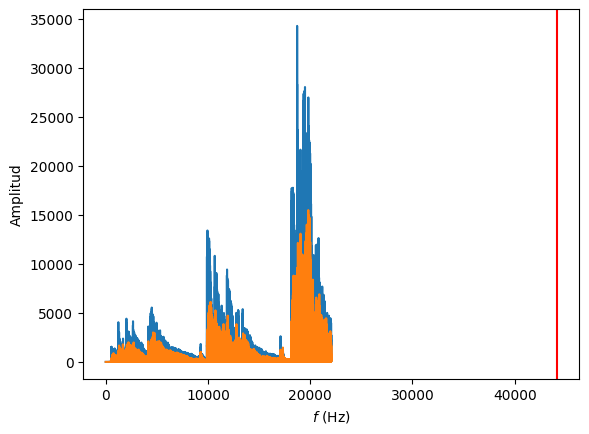

In [10]:
# Definimos diferentes epsilons: la parte de
# la energia del espectro que NO conservamos.
eps = [1e-5, .02, .041, .063, .086, .101, .123]

# Jugamos con los valores de epsilon (ID VARIANDO ESTE VALOR Y MIRAD LA GRÁFICA).
eps = eps[0]
print(f'Epsilon: {eps}')

# Calculamos el valor de corte para esta energia.
thr_spec_energy = (1 - eps) * np.sum(abs_ch_Fourier)
print(f'Valor de corte para la energia del espectro: {thr_spec_energy}')

# Integral de la frecuencia --> energia del espectro.
spec_energy = np.cumsum(abs_ch_Fourier)

# Mascara (array booleano) que compara el
# valor de corte con la energia del espectro.
frequencies_to_remove = thr_spec_energy < spec_energy  
print(f'Mascara: {frequencies_to_remove}')

# La frecuencia f0 por la que cortamos el espectro.
f0 = (len(frequencies_to_remove) - np.sum(frequencies_to_remove)) * (Fs/2) / (n//2)
print(f'Frecuencia de corte f0 (Hz): {int(f0)}')

# Graficamos.
plt.axvline(f0, color='r')
plt.plot(np.linspace(0, Fs/2, n//2), abs_ch_Fourier)
plt.ylabel('Amplitud')
plt.xlabel('$f$ (Hz)')
plt.show()